In [1]:
import torch
import torch.nn as nn
conv = nn.Conv2d(3, 16, kernel_size=3) #建構一個卷積層
conv

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [2]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

### 匯入第6章的資料

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

### 接續本章內容

In [6]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0)) #先在img的第0軸加入批次軸，再傳進conv模組
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

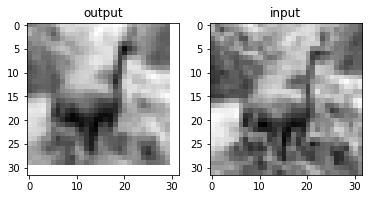

In [7]:
from matplotlib import pyplot as plt
ax1 = plt.subplot(1, 2, 1)   
plt.title('output')  
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  
plt.imshow(img.mean(0), cmap='gray')  
plt.title('input') 
plt.show()

In [8]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) #這裡設定了填補
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [9]:
with torch.no_grad():
    conv.bias.zero_() #將卷積層的bias設為0
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0) #將卷積層的weights設為1/9(編註：這樣就能讓每個輸出值等於所有像素的平均值)

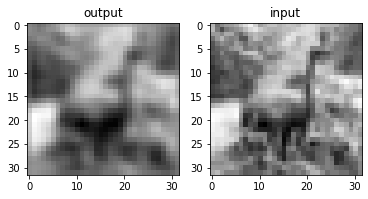

In [10]:
output = conv(img.unsqueeze(0))
ax1 = plt.subplot(1, 2, 1)   
plt.title('output')  
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  
plt.imshow(img.mean(0), cmap='gray')  
plt.title('input') 
plt.show()

In [11]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0], #手動設定核權重矩陣中的值
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

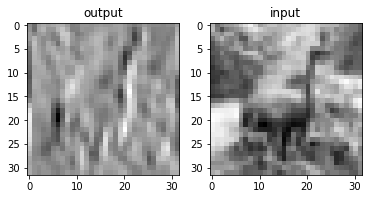

In [12]:
output = conv(img.unsqueeze(0))
ax1 = plt.subplot(1, 2, 1)   
plt.title('output')  
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  
plt.imshow(img.mean(0), cmap='gray')  
plt.title('input') 
plt.show()

In [13]:
pool = nn.MaxPool2d(2) #將池化區域設成2
output = pool(img.unsqueeze(0)) #編註：此處一樣要先在第0軸添加一個批次軸
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [14]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1), #第一層卷積層:將RGB三個通道的圖片轉成16個通道，進而產生16個能辨識鳥&飛機的低階特徵
            nn.Tanh(), # 激活函數
            nn.MaxPool2d(2), #第一層最大池化層: 縮小兩倍，將原本32*32圖片縮小成16*16
            nn.Conv2d(16, 8, kernel_size=3, padding=1), #第二層卷積層:輸出16*16的8通道圖片
            nn.Tanh(),
            nn.MaxPool2d(2), #第二層最大池化層
            # ... 模型的其餘部分先省略，接下來會進行說明
            )

In [15]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... 請注意，這邊省略了很重要的東西，稍後會進行解釋。
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [16]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [17]:
# model(img.unsqueeze(0)) #嘗試運行模型

In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)  #之前省略的部分（扁平化卷積模組的輸出）
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [19]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [20]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [21]:
model = Net()#建立一個Net()物件
model(img.unsqueeze(0))#嘗試運行模型

tensor([[ 0.0203, -0.0972]], grad_fn=<AddmmBackward>)

In [22]:
import datetime  #使用Python內建的datetime模組
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  #控制訓練週期的迴圈，注意範圍是從1開始到n_epochs，而非從0開始
        loss_train = 0.0
        for imgs, labels in train_loader:  #走訪train_loader，每次會取出一批次的訓練資料及標籤
            outputs = model(imgs)  #將一批次資料餵入模型中
            loss = loss_fn(outputs, labels)  #計算損失（最小化的目標）
            optimizer.zero_grad()  #將上一輪的梯度清除
            loss.backward()  #反向運行一次，以便取得損失對所有可訓練參數的梯度 
            optimizer.step()  #更新模型參數
            loss_train += loss.item()  #將此次訓練週期中的所有損失加總起來；請記得，必須用item()將損失轉換為Python中的數字
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  #將損失總和除以批次量（即train_loader的長度），以取得每批次的平均損失（相較於總和，以平均值來測量損失更加直觀）

In [23]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)  #先將cifar資料集隨機洗牌，然後我們每次讀取時會由其中抽取一批次（64筆）的資料
model = Net()  #建立模型
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)  #隨機梯度下降優化器
loss_fn = nn.CrossEntropyLoss()  #第7.10節中提過的交叉熵損失函數

training_loop(  #呼叫稍早之前定義的訓練迴圈
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2021-07-05 12:30:59.986926 Epoch 1, Training loss 0.5551030288456352
2021-07-05 12:32:17.650062 Epoch 10, Training loss 0.3353536926257383
2021-07-05 12:33:52.185035 Epoch 20, Training loss 0.29047160287191914
2021-07-05 12:34:54.375603 Epoch 30, Training loss 0.2629807347514827
2021-07-05 12:35:58.999938 Epoch 40, Training loss 0.24225947322549335
2021-07-05 12:36:55.714481 Epoch 50, Training loss 0.22723164694134595
2021-07-05 12:37:53.246363 Epoch 60, Training loss 0.2125118343503612
2021-07-05 12:38:53.869860 Epoch 70, Training loss 0.19915703162076367
2021-07-05 12:39:49.382363 Epoch 80, Training loss 0.18676545466207395
2021-07-05 12:40:44.570143 Epoch 90, Training loss 0.17257353876996193
2021-07-05 12:41:40.250343 Epoch 100, Training loss 0.15836576775760408


In [24]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False) #取得訓練資料集（推論階段，不用洗牌）
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False) #取得驗證資料集（推論階段，不用洗牌）

def validate(model, train_loader, val_loader): #定義用來計算模型準確度（在訓練資料及驗證資料上）的函式
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():  #由於不需要做參數更新，因此不須計算梯度
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) #取得最大值所在的索引，並存進predicted陣列
                total += labels.shape[0]  #計算一共有多少樣本
                correct += int((predicted == labels).sum())  #比較預測陣列與標籤陣列，進而得到一個布林陣列。接著，算出該批次中有多少預測是正確的

        print("Accuracy {}: {:.2f}".format(name , correct / total)) #印出準確率

validate(model, train_loader, val_loader) #同時取得訓練資料集及驗證資料集的準確度

Accuracy train: 0.93
Accuracy val: 0.89


In [25]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [26]:
loaded_model = Net()  #必須確保在儲存到匯入參數的這段期間，Net類別的定義未被更改
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt')) #載入剛剛儲存的模型參數

<All keys matched successfully>

In [27]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.") #可以根據輸出結果知道是否有可用的GPU

Training on device cuda.


In [28]:
import datetime
import collections
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  #將imgs和labels轉移到指定硬體（由device變數決定）
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

### 額外補充：修改之前的validate函式，並新增一個字典記錄接下來不同網路設計的表現，以方便最後的資料視覺化

In [29]:
all_acc_dict = collections.OrderedDict()
def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():  #由於不需要做參數更新，因此不須計算梯度
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) #取得最大值所在的索引，並存進predicted陣列
                total += labels.shape[0]  #計算一共有多少樣本
                correct += int((predicted == labels).sum())  #比較預測陣列與標籤陣列，進而得到一個布林陣列。接著，算出該批次中有多少預測是正確的

        print("Accuracy {}: {:.2f}".format(name , correct / total)) #印出準確率
        accdict[name] = correct / total
    return accdict

In [30]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device=device)  
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["baseline"] = validate(model, train_loader, val_loader) #額外補充：記錄表現資料

2021-07-05 12:41:51.510818 Epoch 1, Training loss 0.582770695731898
2021-07-05 12:41:58.317903 Epoch 10, Training loss 0.33470599732960865
2021-07-05 12:42:05.904770 Epoch 20, Training loss 0.29744569587100084
2021-07-05 12:42:13.723472 Epoch 30, Training loss 0.2712179112016775
2021-07-05 12:42:22.105617 Epoch 40, Training loss 0.25067995365258233
2021-07-05 12:42:29.232483 Epoch 50, Training loss 0.23202436350902933
2021-07-05 12:42:36.368672 Epoch 60, Training loss 0.2163092453673387
2021-07-05 12:42:44.014601 Epoch 70, Training loss 0.20208472924627316
2021-07-05 12:42:53.232486 Epoch 80, Training loss 0.1894758308579208
2021-07-05 12:43:01.480704 Epoch 90, Training loss 0.17533829485534863
2021-07-05 12:43:10.034533 Epoch 100, Training loss 0.16204052333049712
Accuracy train: 0.94
Accuracy val: 0.89


In [31]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device))

<All keys matched successfully>

In [32]:
class NetWidth(nn.Module): #創建一個名為NetWidth的子類別
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [33]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [34]:
model = NetWidth().to(device=device)
sum(p.numel() for p in model.parameters())

38386

### 額外補充：訓練NetWidth並記錄其表現資料

In [35]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)  #額外補充：記錄表現資料

2021-07-05 12:43:11.670820 Epoch 1, Training loss 0.5732573238527698
2021-07-05 12:43:20.709636 Epoch 10, Training loss 0.31736949057715713
2021-07-05 12:43:30.728813 Epoch 20, Training loss 0.2772958442853515
2021-07-05 12:43:40.795098 Epoch 30, Training loss 0.2462245342885233
2021-07-05 12:43:52.299917 Epoch 40, Training loss 0.22327412071691197
2021-07-05 12:44:02.660591 Epoch 50, Training loss 0.19796389355591149
2021-07-05 12:44:12.984244 Epoch 60, Training loss 0.17572020796264054
2021-07-05 12:44:24.097427 Epoch 70, Training loss 0.15082860953963487
2021-07-05 12:44:34.521486 Epoch 80, Training loss 0.12995666785130075
2021-07-05 12:44:44.139376 Epoch 90, Training loss 0.1119736946502309
2021-07-05 12:44:53.727498 Epoch 100, Training loss 0.09391113432349672
Accuracy train: 0.97
Accuracy val: 0.90


In [36]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())  #若為L1常規化，只需將此處的pow()改為abs()即可
            loss = loss + l2_lambda * l2_norm #把L2懲罰項加入損失值

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

### 額外補充：訓練加了L2常規化的模型，並記錄其表現資料

In [37]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device=device)  
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False) #取得訓練資料集（不用洗牌）
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False) #取得驗證資料集

all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2021-07-05 12:44:55.278119 Epoch 1, Training loss 0.5974116697432889
2021-07-05 12:45:03.425272 Epoch 10, Training loss 0.35722381569397677
2021-07-05 12:45:12.448530 Epoch 20, Training loss 0.32522475045577737
2021-07-05 12:45:21.911491 Epoch 30, Training loss 0.30310741854701073
2021-07-05 12:45:31.459406 Epoch 40, Training loss 0.28563614816043026
2021-07-05 12:45:42.293523 Epoch 50, Training loss 0.26964350291498146
2021-07-05 12:45:52.607685 Epoch 60, Training loss 0.26151590533317276
2021-07-05 12:46:03.566583 Epoch 70, Training loss 0.24639318774270405
2021-07-05 12:46:13.709504 Epoch 80, Training loss 0.23729015189181468
2021-07-05 12:46:25.228759 Epoch 90, Training loss 0.22693311299677868
2021-07-05 12:46:36.721183 Epoch 100, Training loss 0.21798140664768825
Accuracy train: 0.91
Accuracy val: 0.88


In [38]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4) #編註：個別神經元被丟棄的機率為0.4，換言之，經過dropout處理後，只會留下大約60%的神經元，且每一次留下的神經元基本上是不同的
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out    

### 額外補充：訓練NetDropout並記錄其表現資料

In [39]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = NetDropout().to(device=device)  
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False) #取得訓練資料集（不用洗牌）
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False) #取得驗證資料集

all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2021-07-05 12:46:38.296069 Epoch 1, Training loss 0.5995968278426274
2021-07-05 12:46:47.405405 Epoch 10, Training loss 0.3948354481891462
2021-07-05 12:46:58.094254 Epoch 20, Training loss 0.35877733986089183
2021-07-05 12:47:09.888840 Epoch 30, Training loss 0.3355653543191351
2021-07-05 12:47:21.262630 Epoch 40, Training loss 0.3254245998942928
2021-07-05 12:47:31.871712 Epoch 50, Training loss 0.3084343933755425
2021-07-05 12:47:43.992604 Epoch 60, Training loss 0.2935340715821382
2021-07-05 12:47:57.095148 Epoch 70, Training loss 0.2816340390853821
2021-07-05 12:48:07.344252 Epoch 80, Training loss 0.2674089240705132
2021-07-05 12:48:21.065533 Epoch 90, Training loss 0.25361371296606244
2021-07-05 12:48:31.249049 Epoch 100, Training loss 0.24783432512146653
Accuracy train: 0.90
Accuracy val: 0.88


In [40]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

### 額外補充：訓練NetBatchNorm並記錄其表現資料

In [41]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = NetBatchNorm().to(device=device) 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False) #取得訓練資料集（不用洗牌）
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False) #取得驗證資料集

all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2021-07-05 12:48:33.923505 Epoch 1, Training loss 0.463555916289615
2021-07-05 12:48:45.875089 Epoch 10, Training loss 0.2726136956624924
2021-07-05 12:48:58.843281 Epoch 20, Training loss 0.21581562181377106
2021-07-05 12:49:12.898633 Epoch 30, Training loss 0.17258463709787197
2021-07-05 12:49:25.536546 Epoch 40, Training loss 0.1361332809089855
2021-07-05 12:49:38.016116 Epoch 50, Training loss 0.10895377409401213
2021-07-05 12:49:53.120538 Epoch 60, Training loss 0.07960129949222704
2021-07-05 12:50:07.253442 Epoch 70, Training loss 0.06788012144529516
2021-07-05 12:50:20.704965 Epoch 80, Training loss 0.04475833983368175
2021-07-05 12:50:32.629039 Epoch 90, Training loss 0.02881750245548927
2021-07-05 12:50:45.955086 Epoch 100, Training loss 0.024052293925207986
Accuracy train: 0.99
Accuracy val: 0.89


In [42]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

### 額外補充：訓練NetDepth並記錄其表現資料

In [43]:
###Testing...###
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = NetDepth().to(device=device) 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False) #取得訓練資料集（不用洗牌）
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False) #取得驗證資料集

all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2021-07-05 12:50:47.757051 Epoch 1, Training loss 0.6904243830662624
2021-07-05 12:50:57.288714 Epoch 10, Training loss 0.3546905093322134
2021-07-05 12:51:09.039095 Epoch 20, Training loss 0.30879153643444085
2021-07-05 12:51:21.044819 Epoch 30, Training loss 0.2784927531981924
2021-07-05 12:51:34.122729 Epoch 40, Training loss 0.25124282940367987
2021-07-05 12:51:46.419238 Epoch 50, Training loss 0.22106946349903278
2021-07-05 12:51:59.147834 Epoch 60, Training loss 0.19805292619071949
2021-07-05 12:52:11.028024 Epoch 70, Training loss 0.1700792925752652
2021-07-05 12:52:21.527260 Epoch 80, Training loss 0.14545269329456767
2021-07-05 12:52:32.871792 Epoch 90, Training loss 0.1271228497717411
2021-07-05 12:52:44.437773 Epoch 100, Training loss 0.10194718027428078
Accuracy train: 0.96
Accuracy val: 0.89


In [44]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

### 額外補充：訓練NetRes並記錄其表現資料

In [45]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = NetRes().to(device=device) 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False) #取得訓練資料集（不用洗牌）
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False) #取得驗證資料集

all_acc_dict["res"] = validate(model, train_loader, val_loader)

2021-07-05 12:52:46.303187 Epoch 1, Training loss 0.5861294848524081
2021-07-05 12:52:56.532989 Epoch 10, Training loss 0.3221418481723518
2021-07-05 12:53:07.654370 Epoch 20, Training loss 0.27451830618320755
2021-07-05 12:53:18.995155 Epoch 30, Training loss 0.24232308381492165
2021-07-05 12:53:31.974238 Epoch 40, Training loss 0.21154473337588037
2021-07-05 12:53:44.987678 Epoch 50, Training loss 0.1809568234784588
2021-07-05 12:53:56.692971 Epoch 60, Training loss 0.15813457232656752
2021-07-05 12:54:07.454285 Epoch 70, Training loss 0.13931276454667377
2021-07-05 12:54:18.419899 Epoch 80, Training loss 0.11274864362066339
2021-07-05 12:54:28.960170 Epoch 90, Training loss 0.09558002405153339
2021-07-05 12:54:39.446438 Epoch 100, Training loss 0.07992830526107436
Accuracy train: 0.98
Accuracy val: 0.90


In [46]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  #由於BatchNorm層會抵消偏值的作用，因此這裡將偏值設為False
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  #這裡使用了客製的初始化方法.kaiming_normal_，其利用與原始ResNet論文相同的標準差產生正規化的隨機元素。在初始階段，batch norm的輸出分佈平均值為0、標準差為0.5
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [47]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=100):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

### 額外補充：訓練NetResDeep並記錄其表現資料

In [48]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = NetResDeep().to(device=device)  
optimizer = torch.optim.SGD(model.parameters(), lr=3e-3) #將學習率調小
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False) #取得訓練資料集（不用洗牌）
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False) #取得驗證資料集

all_acc_dict["res deep"] = validate(model, train_loader, val_loader)

2021-07-05 12:55:12.009850 Epoch 1, Training loss 1.7040751952274589
2021-07-05 13:00:04.989427 Epoch 10, Training loss 0.31788895283914675
2021-07-05 13:05:26.672101 Epoch 20, Training loss 0.2547984118958947
2021-07-05 13:10:54.835568 Epoch 30, Training loss 0.19995995335707997
2021-07-05 13:16:26.422140 Epoch 40, Training loss 0.15821962454801153
2021-07-05 13:21:54.580840 Epoch 50, Training loss 0.11823495997821877
2021-07-05 13:27:22.459425 Epoch 60, Training loss 0.09472930479415093
2021-07-05 13:32:44.754780 Epoch 70, Training loss 0.07206326892457096
2021-07-05 13:38:10.165524 Epoch 80, Training loss 0.06067855922345096
2021-07-05 13:43:37.918494 Epoch 90, Training loss 0.03591787596351829


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Asus\Anaconda3\lib\asyncio\selector_events.py", line 114, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Asus\Anaconda3\lib\asyncio\selector_events.py", line 114, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by th

2021-07-05 13:49:11.961102 Epoch 100, Training loss 0.0286766724573125
Accuracy train: 0.99
Accuracy val: 0.88


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Asus\Anaconda3\lib\asyncio\selector_events.py", line 114, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Asus\Anaconda3\lib\asyncio\selector_events.py", line 114, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by th

### 額外補充：經不同網路設計的表現資料視覺化

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Asus\Anaconda3\lib\asyncio\selector_events.py", line 114, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host


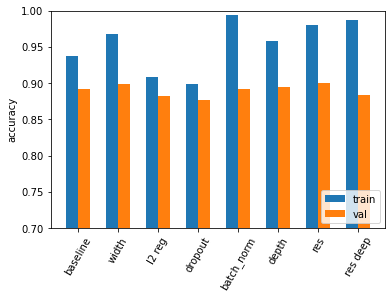

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Asus\Anaconda3\lib\asyncio\selector_events.py", line 114, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host


In [ ]:
import numpy as np
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()